<a href="https://colab.research.google.com/github/edisonaqp/admbio/blob/master/Movilidad_Chile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# importación de librerias preliminares

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
path = '/content/drive/MyDrive/Maestría en Ciencias de la Computación/Asesoría de Tesis/Epidemias/Datasets/Movilidad Chile/Nuevo_IndiceDeMovilidad.csv'

# leemos el excel
df = pd.read_csv(path)
df.head()

,Region,Codigo region,Comuna,Codigo comuna,Superficie_km2,Poblacion,IM_interno,IM_externo,IM,Fecha
0,Biobío,8.0,Alto Biobío,8314,2124.77,6775.0,0.292276,0.554280,0.846555,2020-02-26
1,Biobío,8.0,Alto Biobío,8314,2124.77,6775.0,0.337161,0.465553,0.802714,2020-02-27
2,Biobío,8.0,Alto Biobío,8314,2124.77,6775.0,0.383090,0.551148,0.934238,2020-02-28
3,Biobío,8.0,Alto Biobío,8314,2124.77,6775.0,0.545929,0.849687,1.395616,2020-02-29
4,Biobío,8.0,Alto Biobío,8314,2124.77,6775.0,0.440501,0.739040,1.179541,2020-03-01


In [29]:
df.tail()

,Region,Codigo region,Comuna,Codigo comuna,Superficie_km2,Poblacion,IM_interno,IM_externo,IM,Fecha
132021,La Araucanía,9.0,Traiguén,9210,897.07,19314.0,4.120789,3.351299,7.472089,2021-03-26
132022,La Araucanía,9.0,Traiguén,9210,897.07,19314.0,2.563041,1.472089,4.035130,2021-03-27
132023,La Araucanía,9.0,Traiguén,9210,897.07,19314.0,2.394129,1.271415,3.665544,2021-03-28
132024,NaN,NaN,NaN,11302,7781.76,661.0,NaN,NaN,NaN,NaN
132025,NaN,NaN,NaN,12202,1250257.60,137.0,NaN,NaN,NaN,NaN


In [30]:
# verificar las dimensiones
df.shape

(132026, 10)

In [34]:
#eliminamos filas nulas
df.dropna(inplace=True)

In [35]:
df.shape

(132024, 10)

In [36]:
df.tail()

,Region,Codigo region,Comuna,Codigo comuna,Superficie_km2,Poblacion,IM_interno,IM_externo,IM,Fecha
132019,La Araucanía,9.0,Traiguén,9210,897.07,19314.0,3.833494,3.110202,6.943696,2021-03-24
132020,La Araucanía,9.0,Traiguén,9210,897.07,19314.0,3.742541,3.086622,6.829163,2021-03-25
132021,La Araucanía,9.0,Traiguén,9210,897.07,19314.0,4.120789,3.351299,7.472089,2021-03-26
132022,La Araucanía,9.0,Traiguén,9210,897.07,19314.0,2.563041,1.472089,4.035130,2021-03-27
132023,La Araucanía,9.0,Traiguén,9210,897.07,19314.0,2.394129,1.271415,3.665544,2021-03-28


In [39]:
# datos duplicados
df.duplicated().sum()

0

In [40]:
# verificar los tipos de datos
df.dtypes

,0
Region,object
Codigo region,float64
Comuna,object
Codigo comuna,int64
Superficie_km2,float64
Poblacion,float64
IM_interno,float64
IM_externo,float64
IM,float64
Fecha,object


In [41]:
# Convertir fecha
df['Fecha'] = pd.to_datetime(df['Fecha'])

In [42]:
df.describe()

,Codigo region,Codigo comuna,Superficie_km2,Poblacion,IM_interno,IM_externo,IM,Fecha
count,132024.000000,132024.000000,132024.000000,132024.000000,132024.000000,132024.000000,132024.000000,132024
mean,8.783615,9020.905714,2165.482985,56592.760650,2.805686,4.220363,7.026049,2020-09-07 23:20:58.462097408
min,1.000000,1101.000000,6.310000,211.000000,0.000000,0.000000,0.000000,2020-02-26 00:00:00
25%,6.000000,6109.000000,260.940000,10032.000000,1.005801,1.414254,4.100769,2020-05-31 00:00:00
50%,8.000000,8313.000000,631.380000,20223.000000,2.356014,3.298131,6.327676,2020-09-04 00:00:00
75%,13.000000,13104.000000,1638.810000,56252.000000,4.104130,5.801287,9.117080,2020-12-22 00:00:00
max,16.000000,16305.000000,48938.200000,645909.000000,25.444463,68.775152,86.446646,2021-03-28 00:00:00
std,3.846949,3817.891417,4814.069554,88987.923794,2.351750,4.143275,4.885830,NaN


In [25]:
df.nunique()

,0
Region,16
Codigo region,16
Comuna,344
Codigo comuna,344
Superficie_km2,344
Poblacion,344
IM_interno,115598
IM_externo,124324
IM,125748
Fecha,384


In [26]:
df.isnull().sum()  # Valores nulos por columna

,0
Region,0
Codigo region,0
Comuna,0
Codigo comuna,0
Superficie_km2,0
Poblacion,0
IM_interno,0
IM_externo,0
IM,0
Fecha,0


In [27]:
(df == 0).sum()    # Cuenta de valores cero por columna

,0
Region,0
Codigo region,0
Comuna,0
Codigo comuna,0
Superficie_km2,0
Poblacion,0
IM_interno,9922
IM_externo,2503
IM,1997
Fecha,0


In [43]:
# rangos
stats = df.describe(include='all').T
stats['unique'] = df.nunique()
stats[['unique', 'min', 'max']]

,unique,min,max
Region,16,NaN,NaN
Codigo region,16,1.0,16.0
Comuna,344,NaN,NaN
Codigo comuna,344,1101.0,16305.0
Superficie_km2,344,6.31,48938.2
Poblacion,344,211.0,645909.0
IM_interno,115598,0.0,25.444463
IM_externo,124324,0.0,68.775152
IM,125748,0.0,86.446646
Fecha,384,2020-02-26 00:00:00,2021-03-28 00:00:00


In [45]:
df.Region.unique()

array(['Biobío', 'Ñuble', 'Maule', 'Atacama', 'Los Ríos',
       'Arica y Parinacota', 'Aysén del General Carlos Ibáñez del Campo',
       'Metropolitana de Santiago',
       "Libertador General Bernardo O'Higgins",
       'Magallanes y de la Antártica Chilena', 'Valparaíso', 'Coquimbo',
       'Antofagasta', 'Tarapacá', 'Los Lagos', 'La Araucanía'],
      dtype=object)

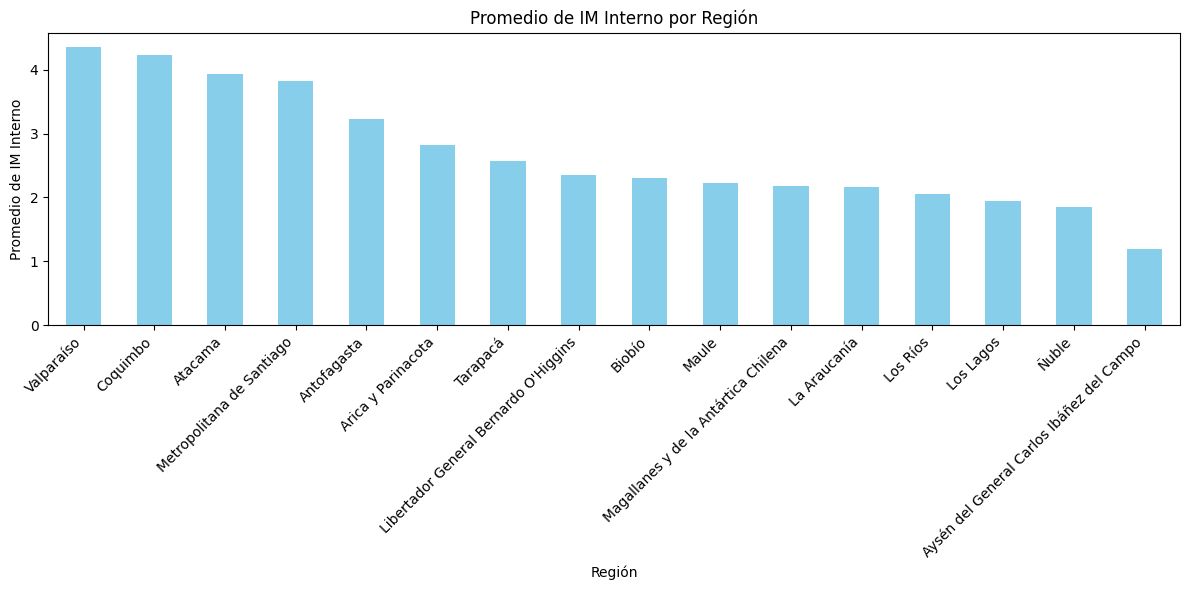

In [55]:
# Calcular el promedio de 'IM_interno' por región
im_interno_por_region = df.groupby('Region')['IM_interno'].mean().sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
im_interno_por_region.plot(kind='bar', color='skyblue')
plt.title('Promedio de IM Interno por Región')
plt.xlabel('Región')
plt.ylabel('Promedio de IM Interno')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

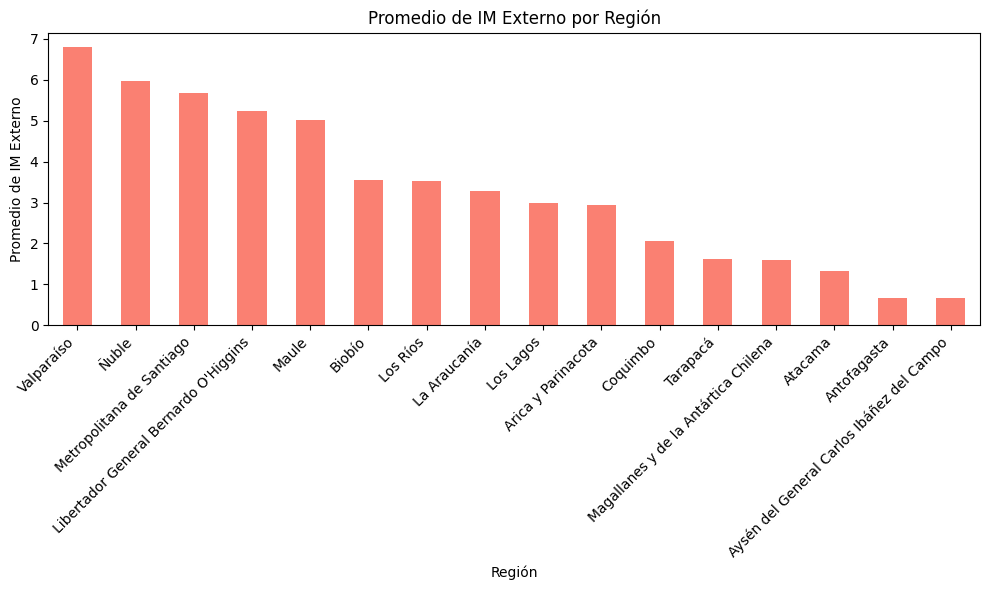

In [51]:
# Calcular el promedio de 'IM_externo' por región
im_externo_por_region = df.groupby('Region')['IM_externo'].mean().sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
im_externo_por_region.plot(kind='bar', color='salmon')
plt.title('Promedio de IM Externo por Región')
plt.xlabel('Región')
plt.ylabel('Promedio de IM Externo')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1200x700 with 0 Axes>

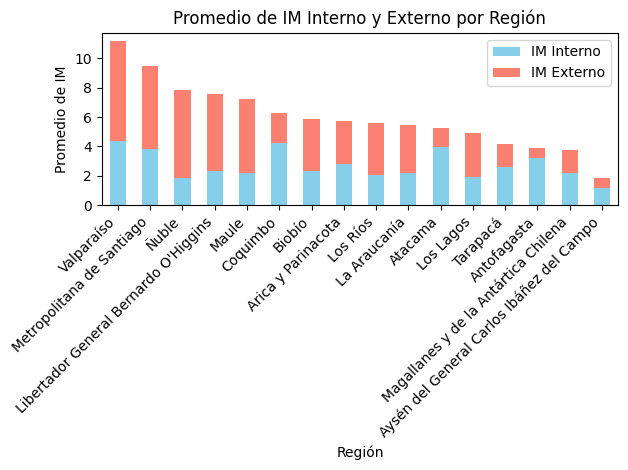

In [77]:
# Calcular el promedio de 'IM_interno' y 'IM_externo' por región
promedio_im_por_region = df.groupby('Region')[['IM_interno', 'IM_externo']].mean()

# Calcular la suma total de 'IM_interno' y 'IM_externo'
promedio_im_por_region['Total'] = promedio_im_por_region['IM_interno'] + promedio_im_por_region['IM_externo']

# Ordenar por la suma total de forma descendente
promedio_im_por_region = promedio_im_por_region.sort_values(by='Total', ascending=False)

# Crear el gráfico de barras apiladas
plt.figure(figsize=(12, 7))
promedio_im_por_region[['IM_interno', 'IM_externo']].plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Promedio de IM Interno y Externo por Región')
plt.xlabel('Región')
plt.ylabel('Promedio de IM')
plt.xticks(rotation=45, ha='right')
plt.legend(['IM Interno', 'IM Externo'])
plt.tight_layout()
plt.show()